In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)

In [6]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

Exploratory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.describe()

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
count 1470.00    1470.00           1470.00    1470.00        1470.00   
mean    36.92     802.49              9.19       2.91           1.00   
std      9.14     403.51              8.11       1.02           0.00   
min     18.00     102.00              1.00       1.00           1.00   
25%     30.00     465.00              2.00       2.00           1.00   
50%     36.00     802.00              7.00       3.00           1.00   
75%     43.00    1157.00             14.00       4.00           1.00   
max     60.00    1499.00             29.00       5.00           1.00   

       EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
count         1470.00                  1470.00     1470.00         1470.00   
mean          1024.87                     2.72       65.89            2.73   
std            602.02                     1.09       20.33            0.71   
min              1.00                     1.00       30.00            1.00   
25%            491.25                     2.00       48.00            2.00   
50%           1020.50                     3.00       66.00            3.00   
75%           1555.75                     4.00       83.75            3.00   
max           2068.00                     4.00      100.00            4.00   

       JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
count   1470.00          1470.00        1470.00      1470.00   
mean       2.06             2.73        6502.93     14313.10   
std        1.11             1.10        4707.96      7117.79   
min        1.00             1.00        1009.00      2094.00   
25%        1.00             2.00        2911.00      8047.00   
50%        2.00             3.00        4919.00     14235.50   
75%        3.00             4.00        8379.00     20461.50   
max        5.00             4.00       19999.00     26999.00   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count             1470.00            1470.00            1470.00   
mean                 2.69              15.21               3.15   
std                  2.50               3.66               0.36   
min                  0.00              11.00               3.00   
25%                  1.00              12.00               3.00   
50%                  2.00              14.00               3.00   
75%                  4.00              18.00               3.00   
max                  9.00              25.00               4.00   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count                   1470.00        1470.00           1470.00   
mean                       2.71          80.00              0.79   
std                        1.08           0.00              0.85   
min                        1.00          80.00              0.00   
25%                        2.00          80.00              0.00   
50%                        3.00          80.00              1.00   
75%                        4.00          80.00              1.00   
max                        4.00          80.00              3.00   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count            1470.00                1470.00          1470.00   
mean               11.28                   2.80             2.76   
std                 7.78                   1.29             0.71   
min                 0.00                   0.00             1.00   
25%                 6.00                   2.00             2.00   
50%                10.00                   3.00             3.00   
75%                15.00                   3.00             3.00   
max                40.00                   6.00             4.00   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count         1470.00             1470.00                  1470.00   
mean             7.01                4.23                     2.19   
std              6.13                3.62

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.duplicated().sum()

0

In [11]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("----------------------------------------------------------")

Age: Number of unique values 43
----------------------------------------------------------
Attrition: Number of unique values 2
----------------------------------------------------------
BusinessTravel: Number of unique values 3
----------------------------------------------------------
DailyRate: Number of unique values 886
----------------------------------------------------------
Department: Number of unique values 3
----------------------------------------------------------
DistanceFromHome: Number of unique values 29
----------------------------------------------------------
Education: Number of unique values 5
----------------------------------------------------------
EducationField: Number of unique values 6
----------------------------------------------------------
EmployeeCount: Number of unique values 1
----------------------------------------------------------
EmployeeNumber: Number of unique values 1470
----------------------------------------------------------
EnvironmentS

In [12]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

Categorical Features

In [13]:
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("------------------------------------------------------")
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
------------------------------------------------------
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
------------------------------------------------------
Department : ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
------------------------------------------------------
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
------------------------------------------------------
Gender : ['Female' 'Male']


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

Numerical Features

In [16]:
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print("====================================")
disc_col.remove('Attrition')

Attrition : [1 0]
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education : [2 1 4 3 5]
EnvironmentSatisfaction : [2 3 4 1]
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobSatisfaction : [4 2 3 1]
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
PerformanceRating : [3 4]
RelationshipSatisfaction : [1 4 2 3]
StockOptionLevel : [0 1 3 2]
TrainingTimesLastYear : [0 3 2 5 1 4 6]
WorkLifeBalance : [1 3 2 4]
YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion : [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager : [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


In [17]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print("---------------------------------------------------------")

Age : Minimum: 18, Maximum: 60
---------------------------------------------------------
DailyRate : Minimum: 102, Maximum: 1499
---------------------------------------------------------
HourlyRate : Minimum: 30, Maximum: 100
---------------------------------------------------------
MonthlyIncome : Minimum: 1009, Maximum: 19999
---------------------------------------------------------
MonthlyRate : Minimum: 2094, Maximum: 26999
---------------------------------------------------------
TotalWorkingYears : Minimum: 0, Maximum: 40
---------------------------------------------------------
YearsAtCompany : Minimum: 0, Maximum: 40
---------------------------------------------------------


Data Visualisation

In [18]:
import hvplot.pandas

In [19]:
df.hvplot.hist(y='DistanceFromHome', by='Attrition', subplots=False, 
               width=600, height=300, bins=30)

:NdOverlay   [Attrition]
   :Histogram   [DistanceFromHome]   (Count)

In [20]:
df.hvplot.hist(y='Education', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [Education]   (Count)

In [21]:
df.hvplot.hist(y='RelationshipSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [RelationshipSatisfaction]   (Count)

In [22]:
df.hvplot.hist(y='EnvironmentSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [EnvironmentSatisfaction]   (Count)

In [23]:
df.hvplot.hist(y='JobInvolvement', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobInvolvement]   (Count)

In [24]:
df.hvplot.hist(y='JobLevel', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobLevel]   (Count)

In [25]:
df.hvplot.hist(y='JobLevel', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobLevel]   (Count)

In [26]:
df.hvplot.hist(y='NumCompaniesWorked', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [NumCompaniesWorked]   (Count)

In [27]:
df.hvplot.hist(y='PercentSalaryHike', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [PercentSalaryHike]   (Count)

In [28]:
df.hvplot.hist(y='StockOptionLevel', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [StockOptionLevel]   (Count)

In [29]:
df.hvplot.hist(y='TrainingTimesLastYear', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [TrainingTimesLastYear]   (Count)

In [30]:
df.hvplot.hist(y='Age', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [Age]   (Count)

In [31]:
df.hvplot.hist(y='MonthlyIncome', by='Attrition', subplots=False, width=600, height=300, bins=50)

:NdOverlay   [Attrition]
   :Histogram   [MonthlyIncome]   (Count)

In [32]:
df.hvplot.hist(y='YearsAtCompany', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [YearsAtCompany]   (Count)

In [33]:
df.hvplot.hist(y='TotalWorkingYears', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [TotalWorkingYears]   (Count)

 Correlation Matrix

In [34]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

In [35]:
from sklearn.preprocessing import LabelEncoder

# Copy to avoid modifying original data
df_encoded = df.copy()

# Encode all object-type columns
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])


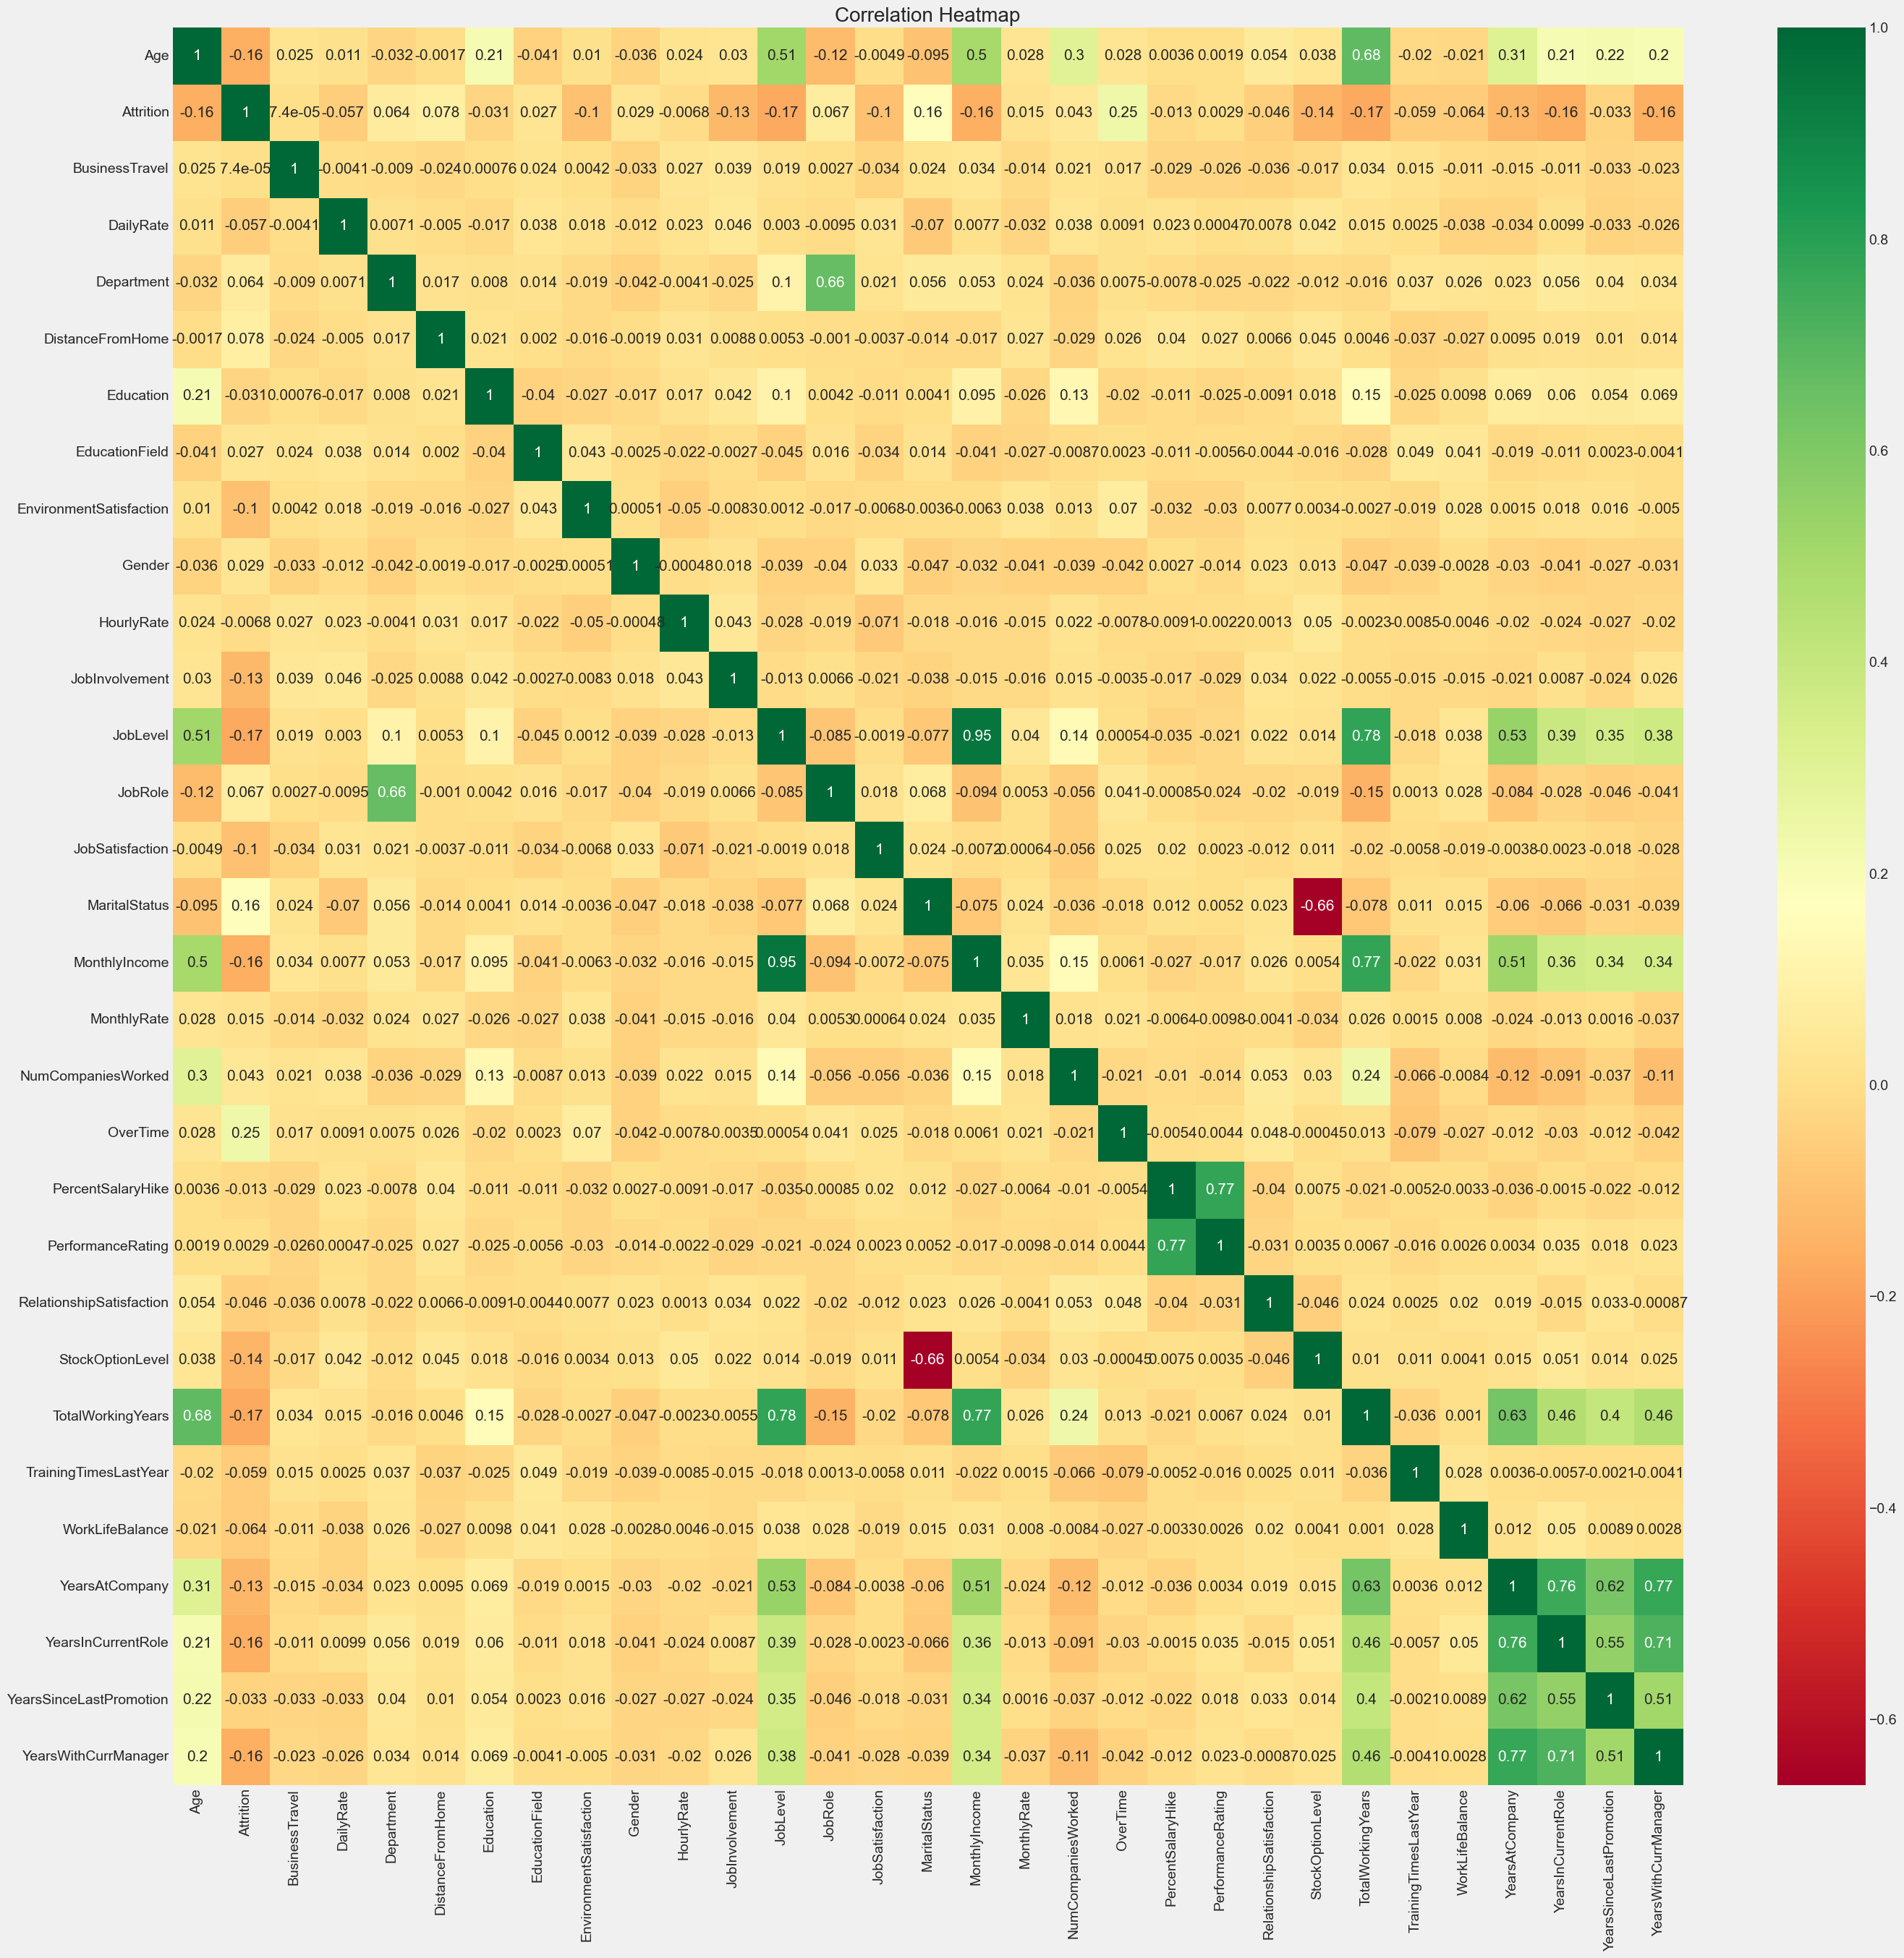

In [36]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_encoded.corr(), annot=True, cmap="RdYlGn", annot_kws={"size": 15})
plt.title("Correlation Heatmap", fontsize=20)
plt.show()


In [37]:
# Now safely compute correlation with encoded 'Attrition'
col = df_encoded.corr().nlargest(20, "Attrition")["Attrition"].index

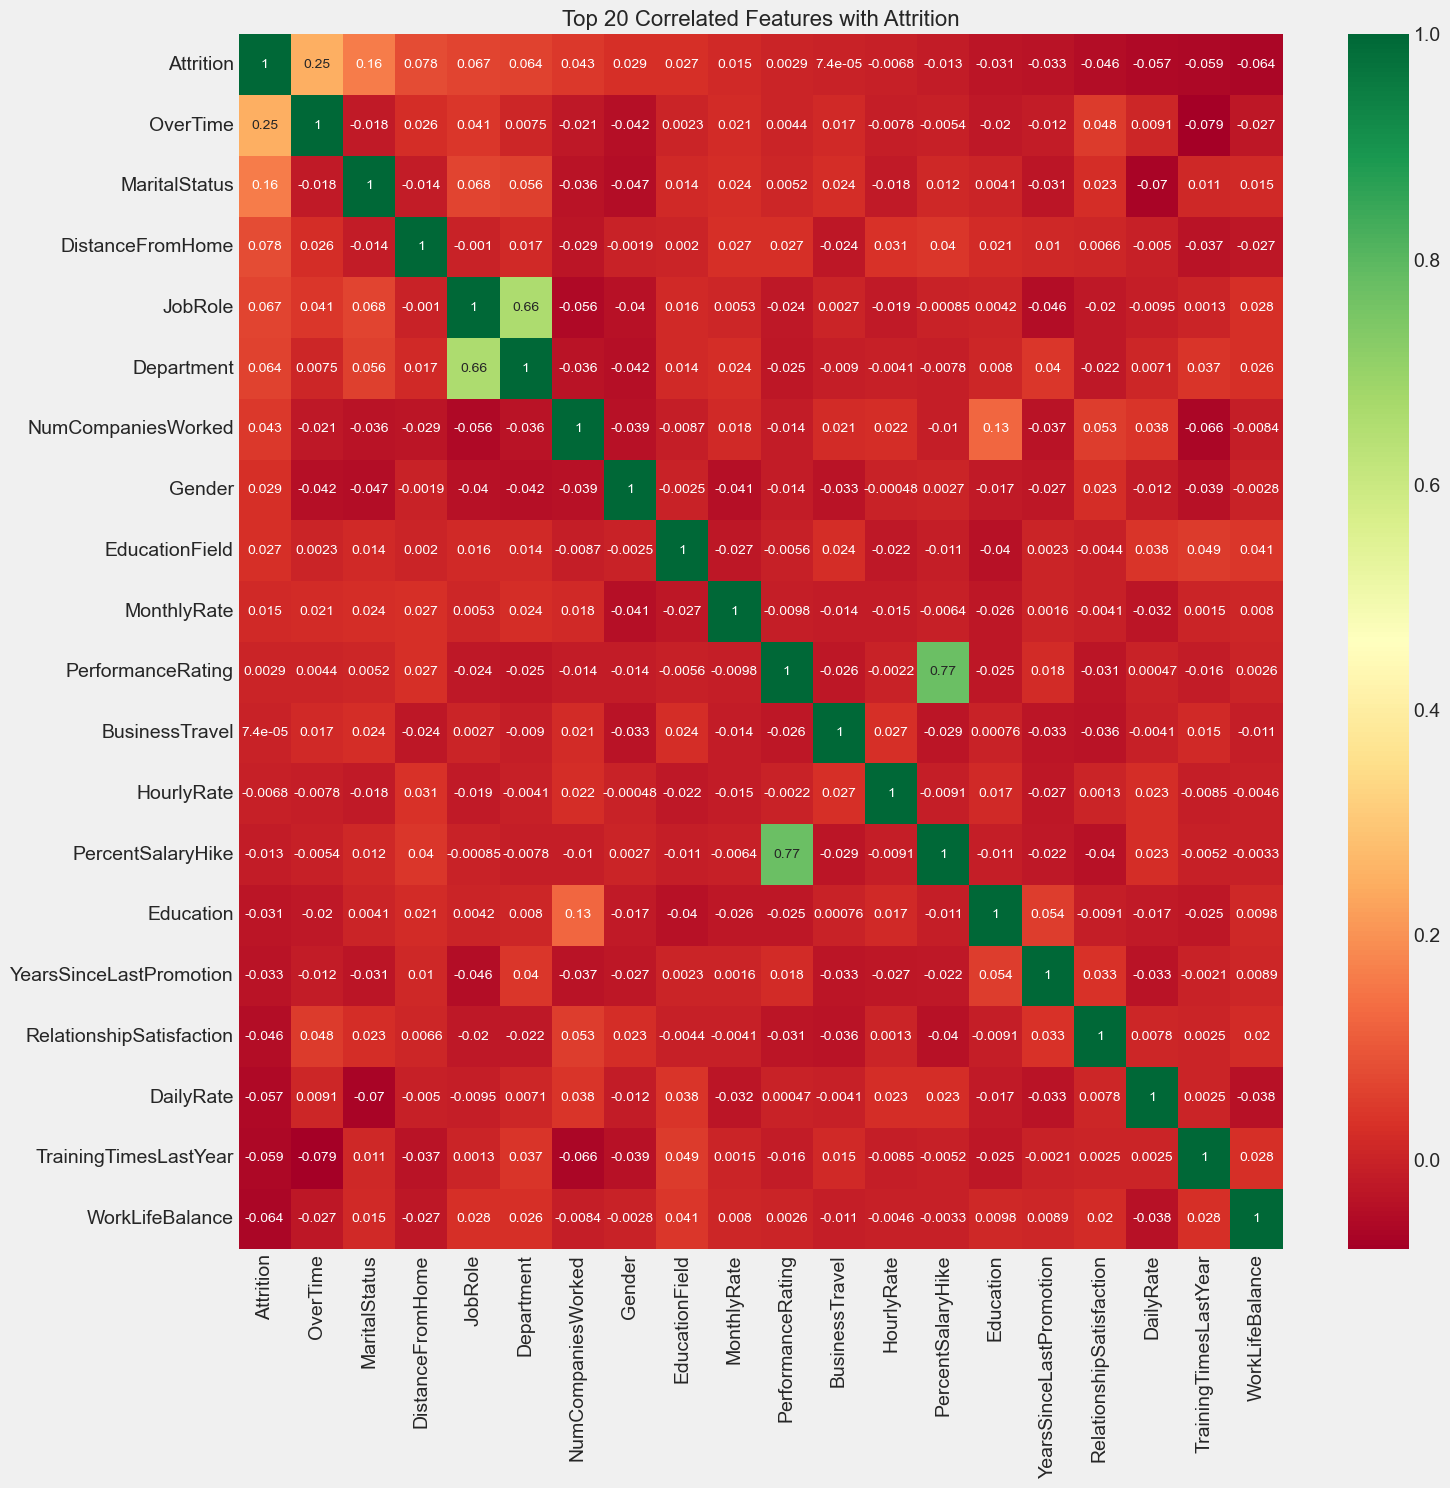

In [38]:
# Plot heatmap of top 20 correlated features
plt.figure(figsize=(15, 15))
sns.heatmap(df_encoded[col].corr(), annot=True, cmap="RdYlGn", annot_kws={"size": 10})
plt.title("Top 20 Correlated Features with Attrition", fontsize=16)
plt.show()

In [39]:
# Now you can compute and plot correlations
df_encoded.drop('Attrition', axis=1).corrwith(df_encoded['Attrition']).hvplot.barh(
    title="Feature Correlation with Attrition",
    width=600,
    height=600,
    color='correlation',
    cmap='RdYlGn')

:Bars   [index]   (0)

 Data Processing

In [40]:
# Transform categorical data into dummies
dummy_col = [column for column in df.drop('Attrition', axis=1).columns if df[column].nunique() < 20]
data = pd.get_dummies(df, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 136 entries, Age to YearsWithCurrManager_17
dtypes: int32(1), int64(8), uint8(127)
memory usage: 280.1 KB


In [41]:
data.shape

(1470, 136)

In [42]:
data.duplicated ().sum()

0

<Axes: >

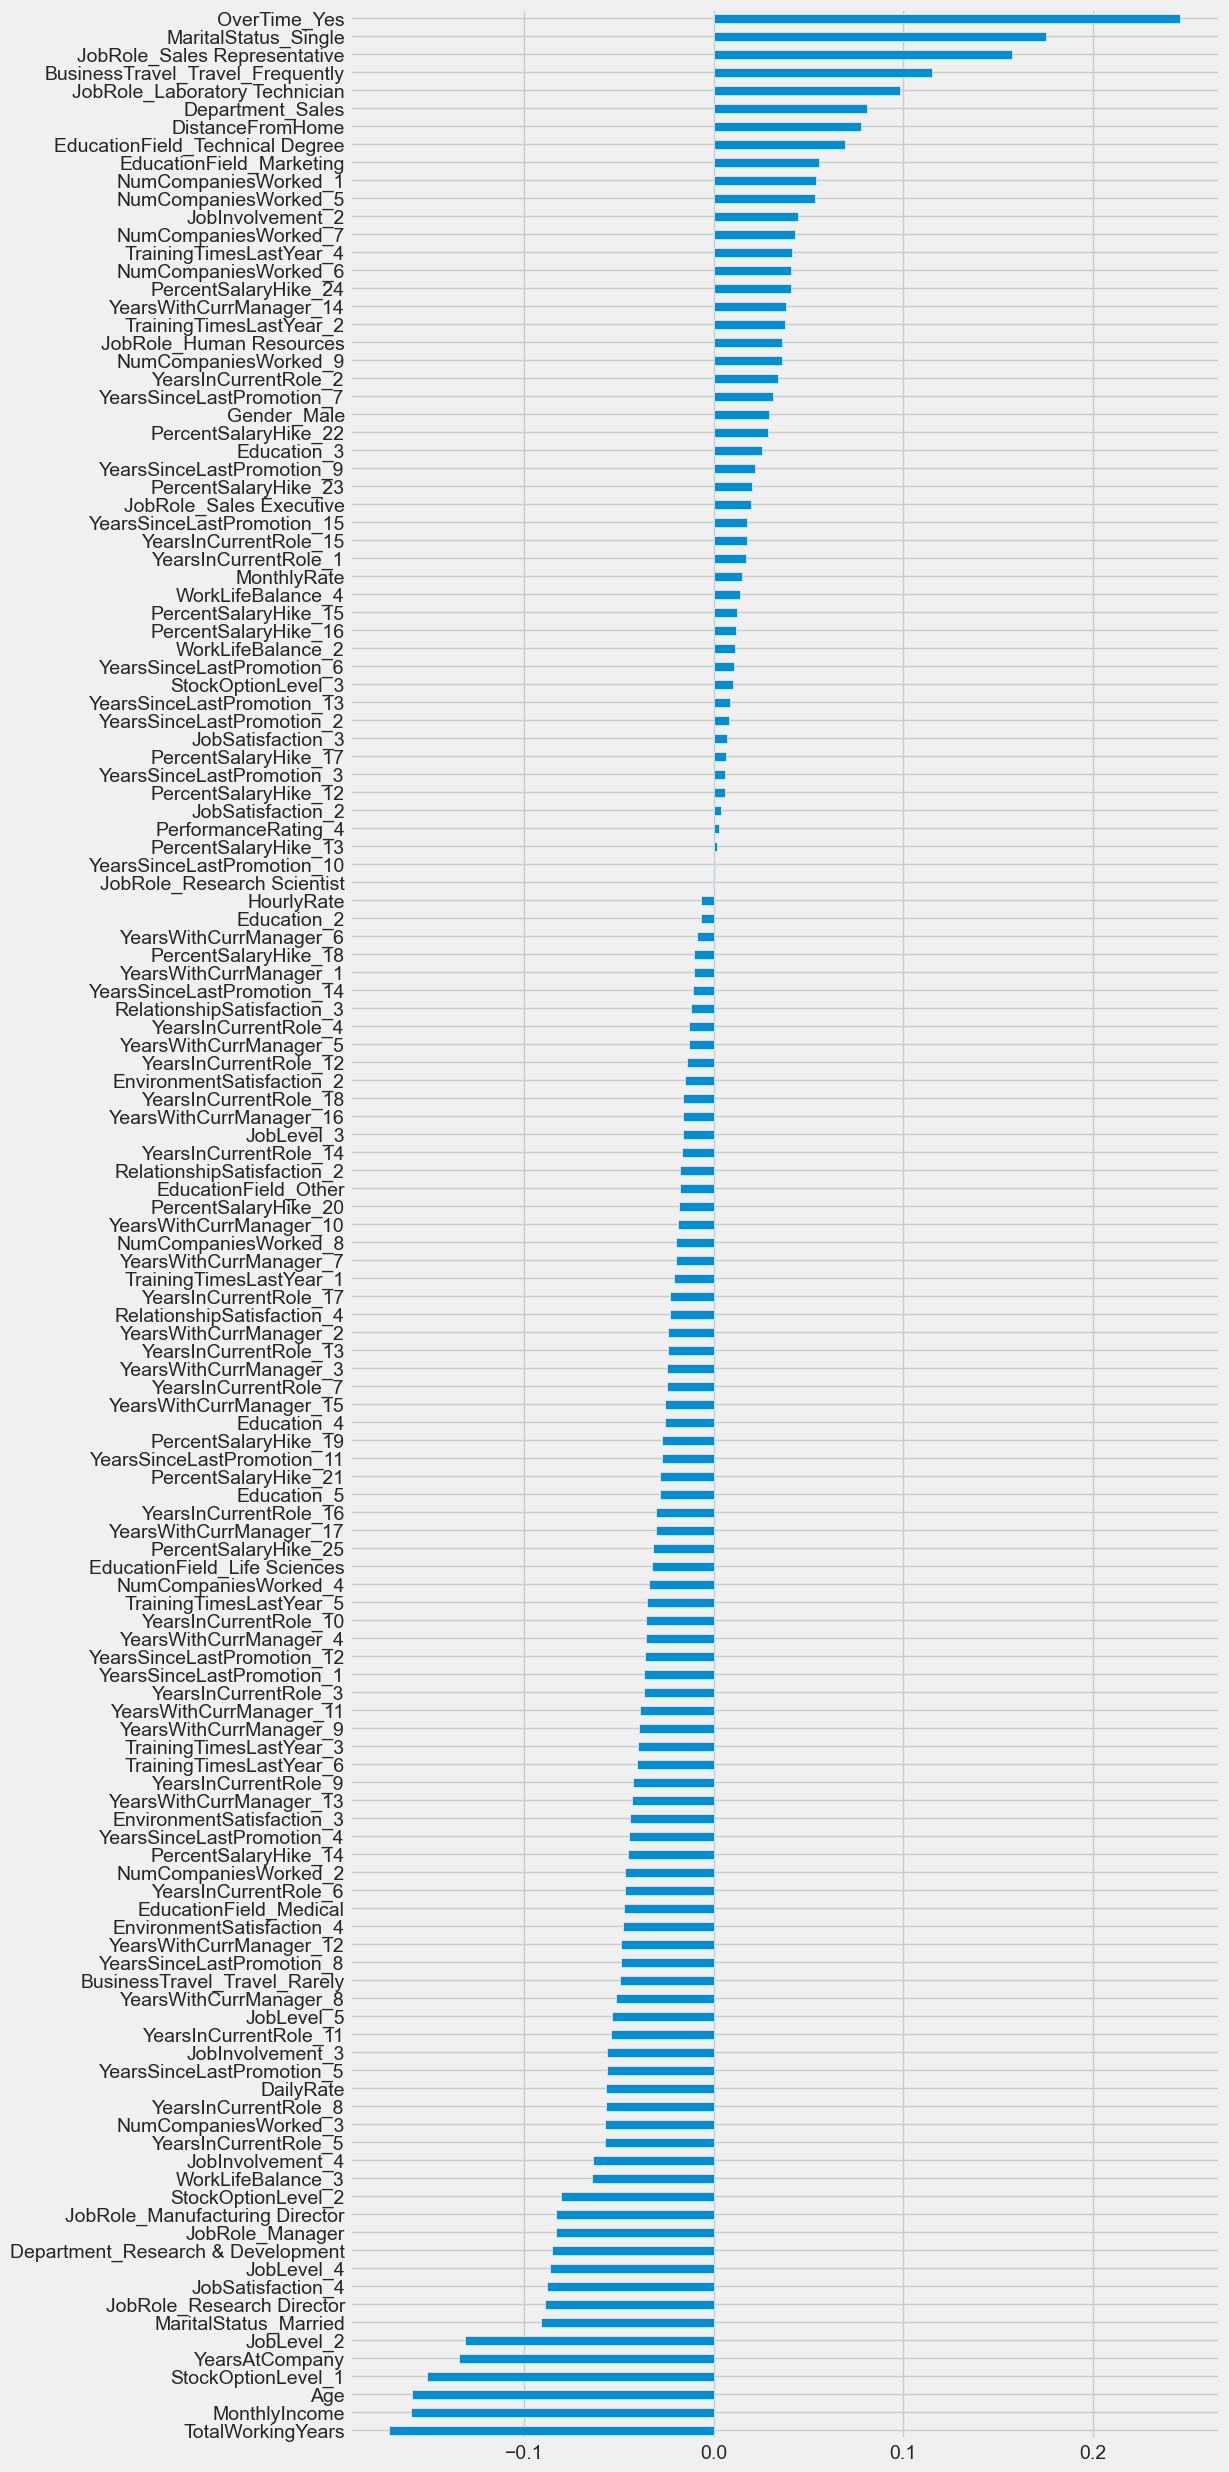

In [43]:
data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [44]:
feature_correlation = data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

92

 Applying machine learning algorithms

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [46]:
X = data.drop('Attrition', axis=1)
y = data.Attrition

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [48]:
scaler = StandardScaler()

In [49]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [50]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [51]:
y_test.value_counts()[0] / y_test.shape[0]

0.8390022675736961

We have an imbalanced data, so if we predict that all our employees will stay we'll have an accuracy of 83.90%.



In [52]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("---------------------TRAIN-------------------")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")


---------------------TRAIN-------------------
Staying Rate: 83.87%
Leaving Rate: 16.13%


In [53]:
stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("-------------------------Test----------------------")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

-------------------------Test----------------------
Staying Rate: 83.90%
Leaving Rate: 16.10%


In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score


In [55]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: ")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: ")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_std, y_train)


LogisticRegression(penalty='l1', solver='liblinear')

In [58]:
evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[849  14]
 [ 59 107]]
ACCURACY SCORE:
0.9291
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.94   0.88      0.93       0.91          0.93
recall      0.98   0.64      0.93       0.81          0.93
f1-score    0.96   0.75      0.93       0.85          0.92
support   863.00 166.00      0.93    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[348  22]
 [ 43  28]]
ACCURACY SCORE:
0.8526
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.89  0.56      0.85       0.73          0.84
recall      0.94  0.39      0.85       0.67          0.85
f1-score    0.91  0.46      0.85       0.69          0.84
support   370.00 71.00      0.85     441.00        441.00


In [59]:
from sklearn.metrics import precision_recall_curve, roc_curve

In [60]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")

In [61]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')


In [62]:
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test_std))


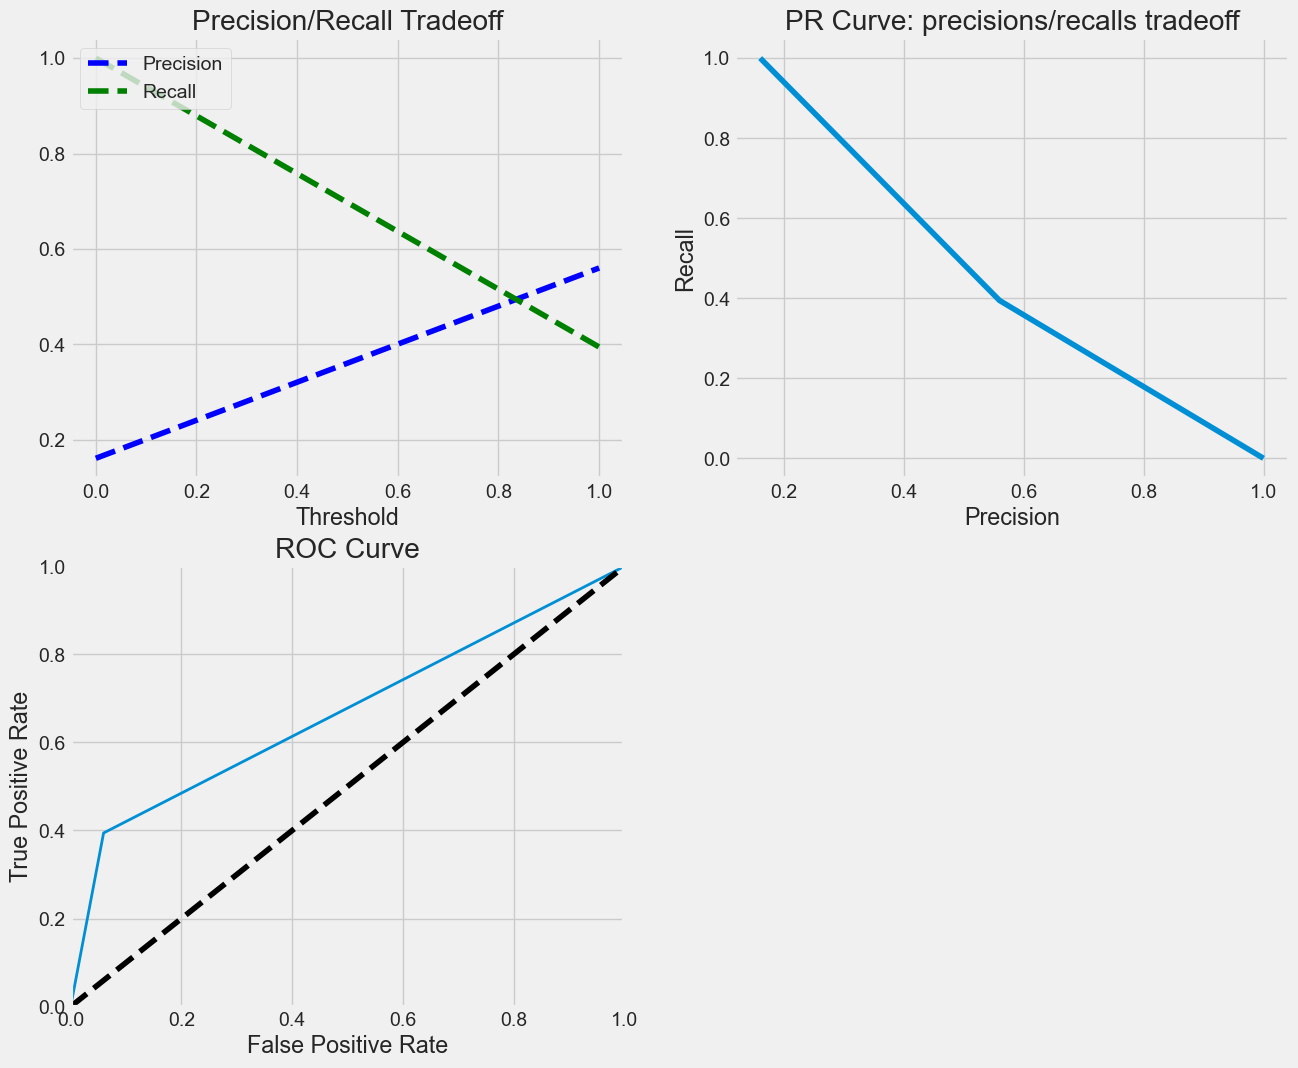

In [63]:
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

In [64]:
scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, lr_clf.predict(X_train_std)),
        'Test': roc_auc_score(y_test, lr_clf.predict(X_test_std)),},}

Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False,)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   863.00 166.00      1.00    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[359  11]
 [ 62   9]]
ACCURACY SCORE:
0.8345
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.85  0.45      0.83       0.65          0.79
recall      0.97  0.13      0.83       0.55          0.83
f1-score    0.91  0.20      0.83       0.55          0.79
support   370.00 71.00      0.83     441.00        441.00


In [67]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [68]:
# Define distribution (you can keep the same ranges)
param_dist = dict(
    n_estimators= [100, 500, 900],
    max_features= ['auto', 'sqrt'],
    max_depth= [2, 3, 5, 10, 15, None],
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 4],
    bootstrap= [True, False])

In [69]:
rf_clf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    rf_clf,
    param_distributions=param_dist,
    n_iter=30,  # Try only 30 random combinations instead of all 648
    scoring='roc_auc',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1)
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\Lalit Karki\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
95 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
69 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lalit Karki\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lalit Karki\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Lalit Karki\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Lalit Kar

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 3, 5, 10, 15, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 500, 900]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [70]:
# Fit best model
rf_clf = RandomForestClassifier(**random_search.best_params_, random_state=42)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [ 31 135]]
ACCURACY SCORE:
0.9699
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.97   1.00      0.97       0.98          0.97
recall      1.00   0.81      0.97       0.91          0.97
f1-score    0.98   0.90      0.97       0.94          0.97
support   863.00 166.00      0.97    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[365   5]
 [ 66   5]]
ACCURACY SCORE:
0.8390
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.85  0.50      0.84       0.67          0.79
recall      0.99  0.07      0.84       0.53          0.84
f1-score    0.91  0.12      0.84       0.52          0.78
support   370.00 71.00      0.84     441.00        441.00


In [71]:
precisions, recalls, thresholds = precision_recall_curve(y_test, rf_clf.predict(X_test))


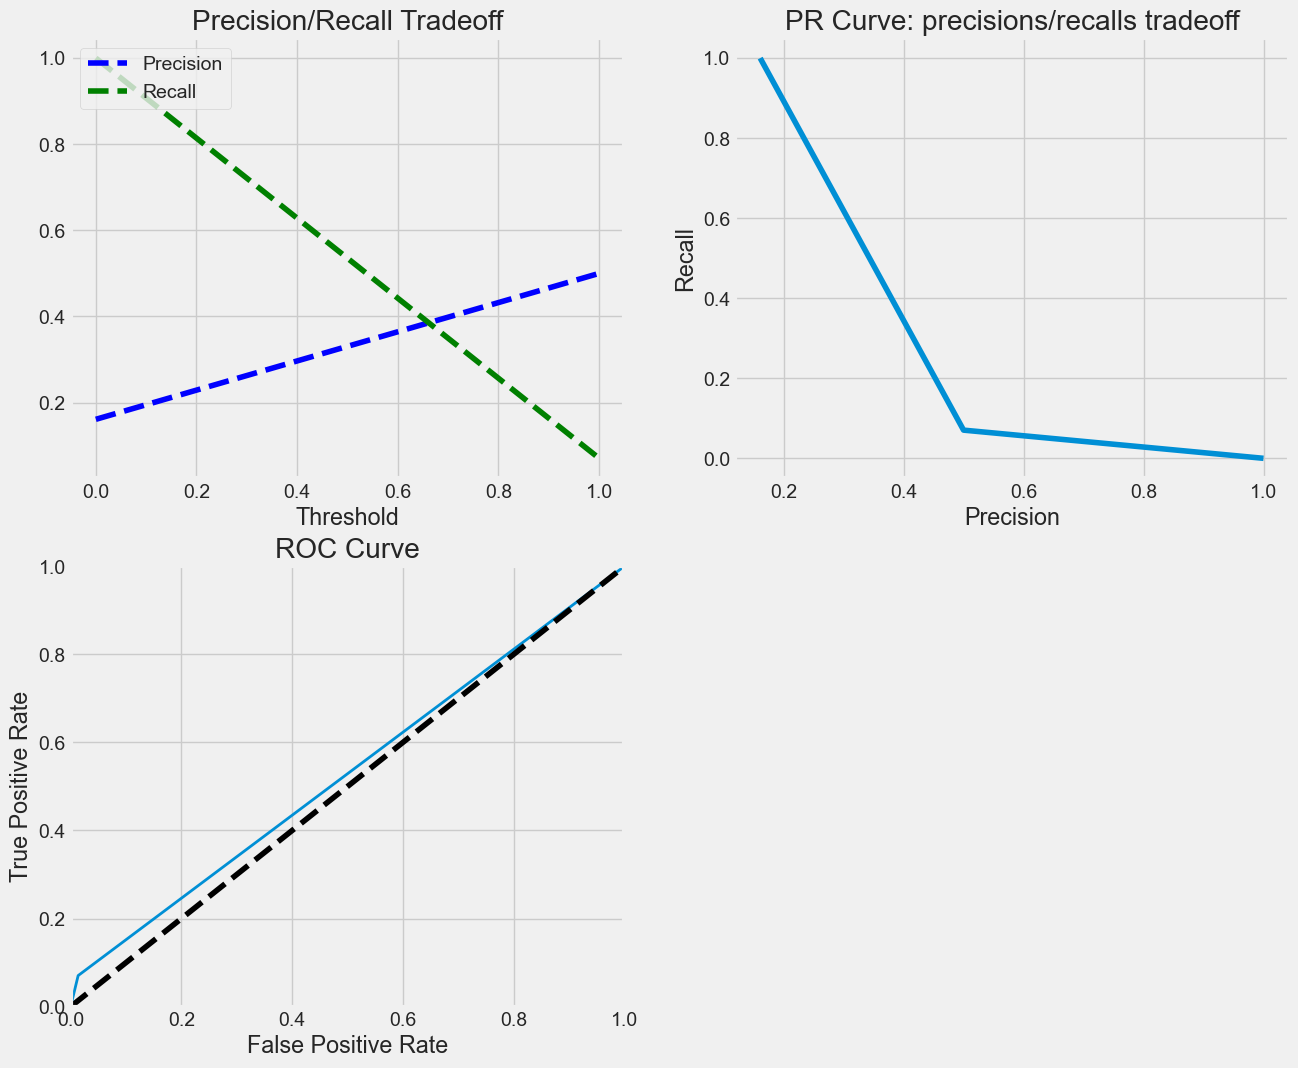

In [72]:
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [73]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)), }

Text(0.5, 1.0, 'Feature Importance according to Random Forest')

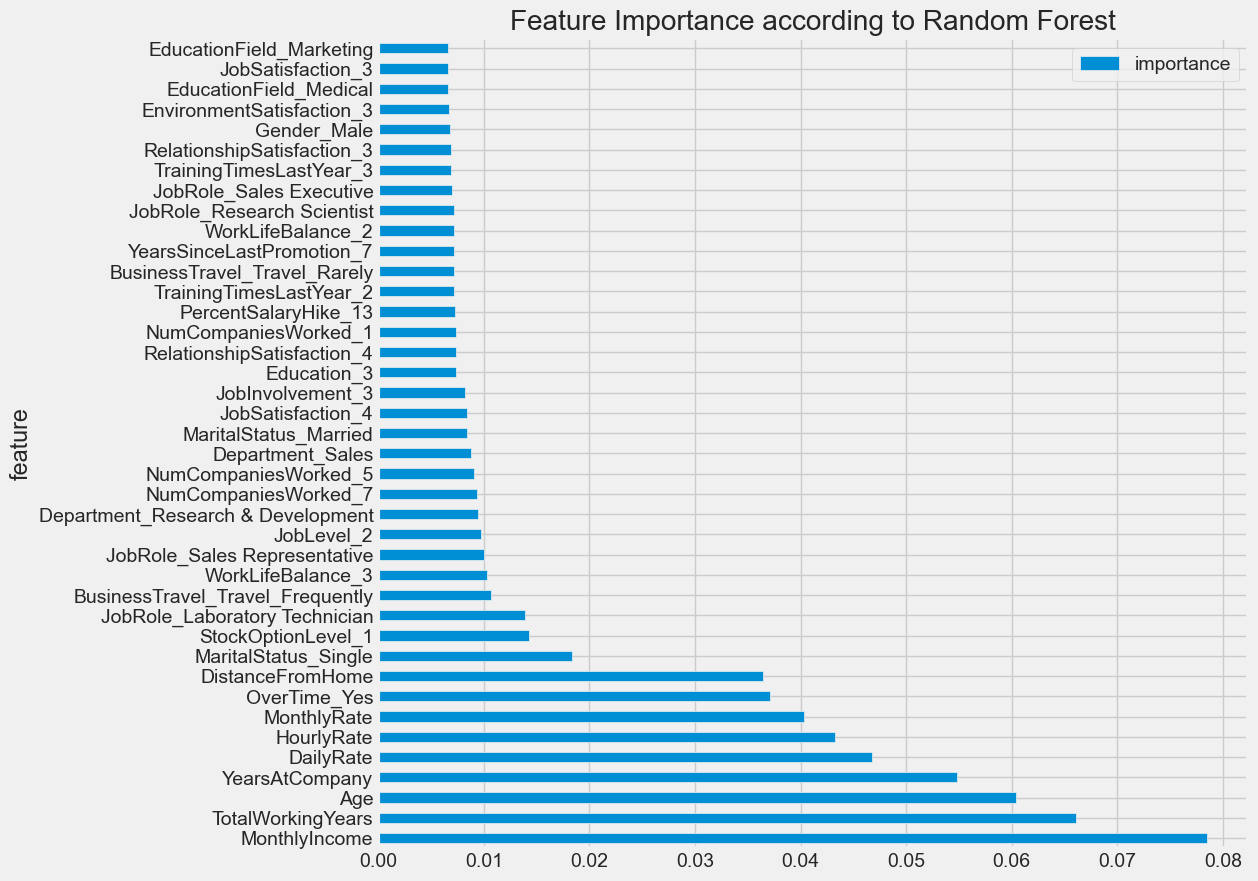

In [74]:
df = feature_imp(X, rf_clf)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')

 Support Vector Machine

In [75]:
from sklearn.svm import SVC

In [76]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_std, y_train)

SVC(kernel='linear')

In [77]:
evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[855   8]
 [ 47 119]]
ACCURACY SCORE:
0.9466
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.95   0.94      0.95       0.94          0.95
recall      0.99   0.72      0.95       0.85          0.95
f1-score    0.97   0.81      0.95       0.89          0.94
support   863.00 166.00      0.95    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[345  25]
 [ 44  27]]
ACCURACY SCORE:
0.8435
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.89  0.52      0.84       0.70          0.83
recall      0.93  0.38      0.84       0.66          0.84
f1-score    0.91  0.44      0.84       0.67          0.83
support   370.00 71.00      0.84     441.00        441.00


In [78]:
svm_clf = SVC(random_state=42)

In [79]:
param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]

In [80]:
random_search = RandomizedSearchCV(
    svm_clf,
    param_distributions=param_grid,  # use the same grid
    n_iter=10,  # Try only 10 random combinations
    scoring='roc_auc',
    cv=3,
    random_state=42,
    verbose=1,
    n_jobs=-1)
random_search.fit(X_train_std, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
                   param_distributions=[{'C': [1, 10, 100, 1000],
                                         'kernel': ['linear']},
                                        {'C': [1, 10, 100, 1000],
                                         'gamma': [0.001, 0.0001],
                                         'kernel': ['rbf']}],
                   random_state=42, scoring='roc_auc', verbose=1)

In [81]:
svm_clf = SVC(**random_search.best_params_, random_state=42)
svm_clf.fit(X_train_std, y_train)
evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[862   1]
 [  6 160]]
ACCURACY SCORE:
0.9932
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.99   0.99      0.99       0.99          0.99
recall      1.00   0.96      0.99       0.98          0.99
f1-score    1.00   0.98      0.99       0.99          0.99
support   863.00 166.00      0.99    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[346  24]
 [ 42  29]]
ACCURACY SCORE:
0.8503
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.89  0.55      0.85       0.72          0.84
recall      0.94  0.41      0.85       0.67          0.85
f1-score    0.91  0.47      0.85       0.69          0.84
support   370.00 71.00      0.85     441.00        441.00


In [82]:
precisions, recalls, thresholds = precision_recall_curve(y_test, svm_clf.predict(X_test_std))

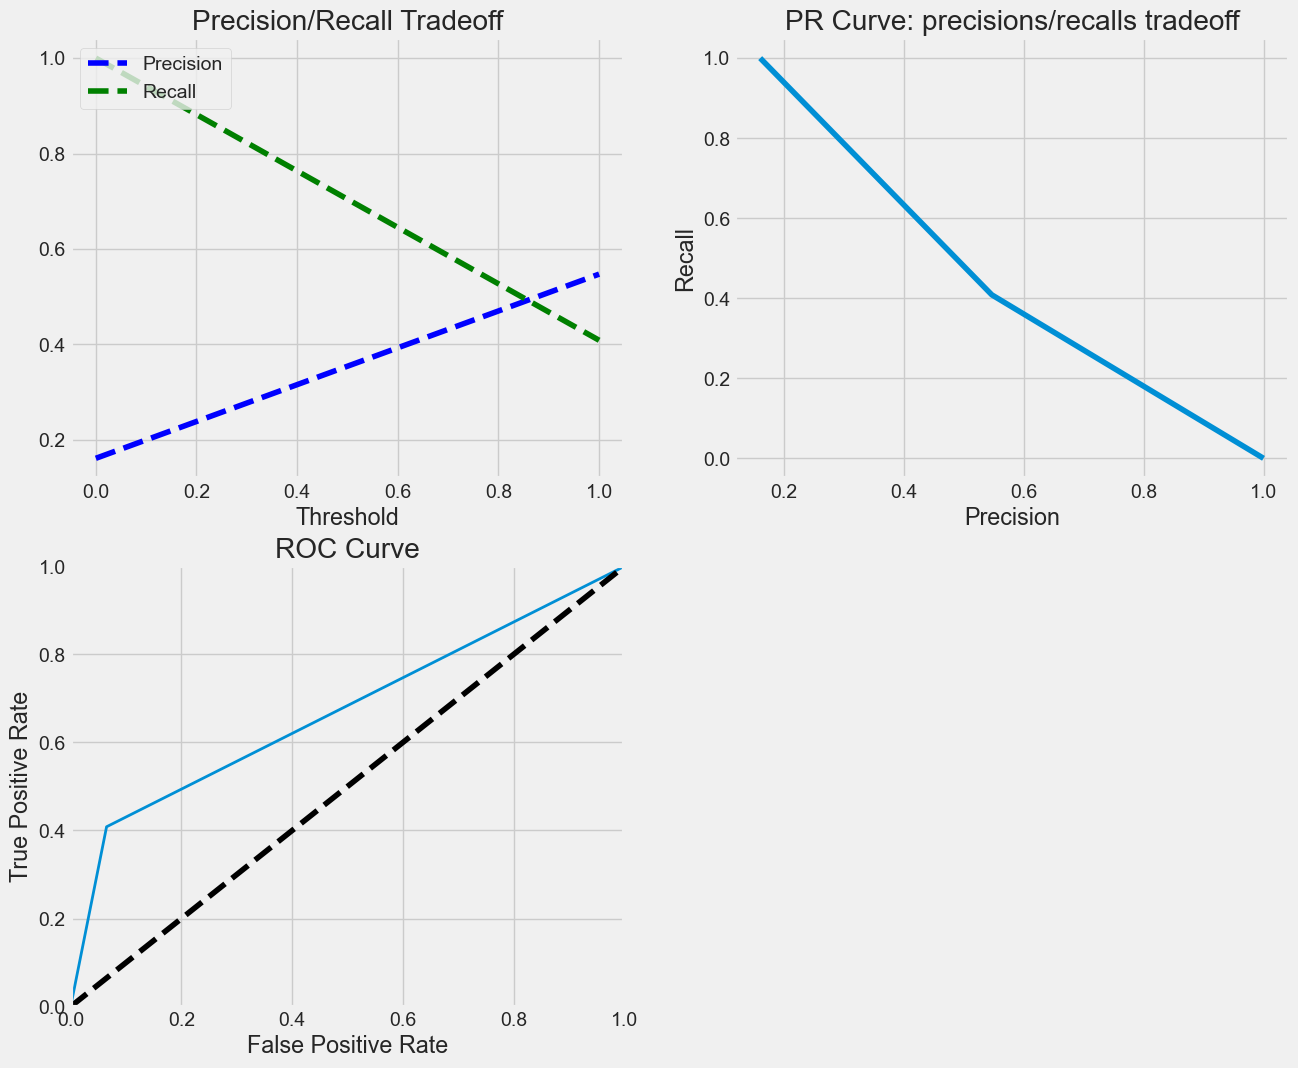

In [83]:
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, svm_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

In [84]:
scores_dict['Support Vector Machine'] = {
        'Train': roc_auc_score(y_train, svm_clf.predict(X_train_std)),
        'Test': roc_auc_score(y_test, svm_clf.predict(X_test_std)),}

XGBoost Classifier

In [85]:
from xgboost import XGBClassifier

In [86]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [87]:
evaluate(xgb_clf, X_train, X_test, y_train, y_test)


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   863.00 166.00      1.00    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[356  14]
 [ 51  20]]
ACCURACY SCORE:
0.8526
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.87  0.59      0.85       0.73          0.83
recall      0.96  0.28      0.85       0.62          0.85
f1-score    0.92  0.38      0.85       0.65          0.83
support   370.00 71.00      0.85     441.00        441.00


In [88]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),}

In [89]:
precisions, recalls, thresholds = precision_recall_curve(y_test, xgb_clf.predict(X_test))

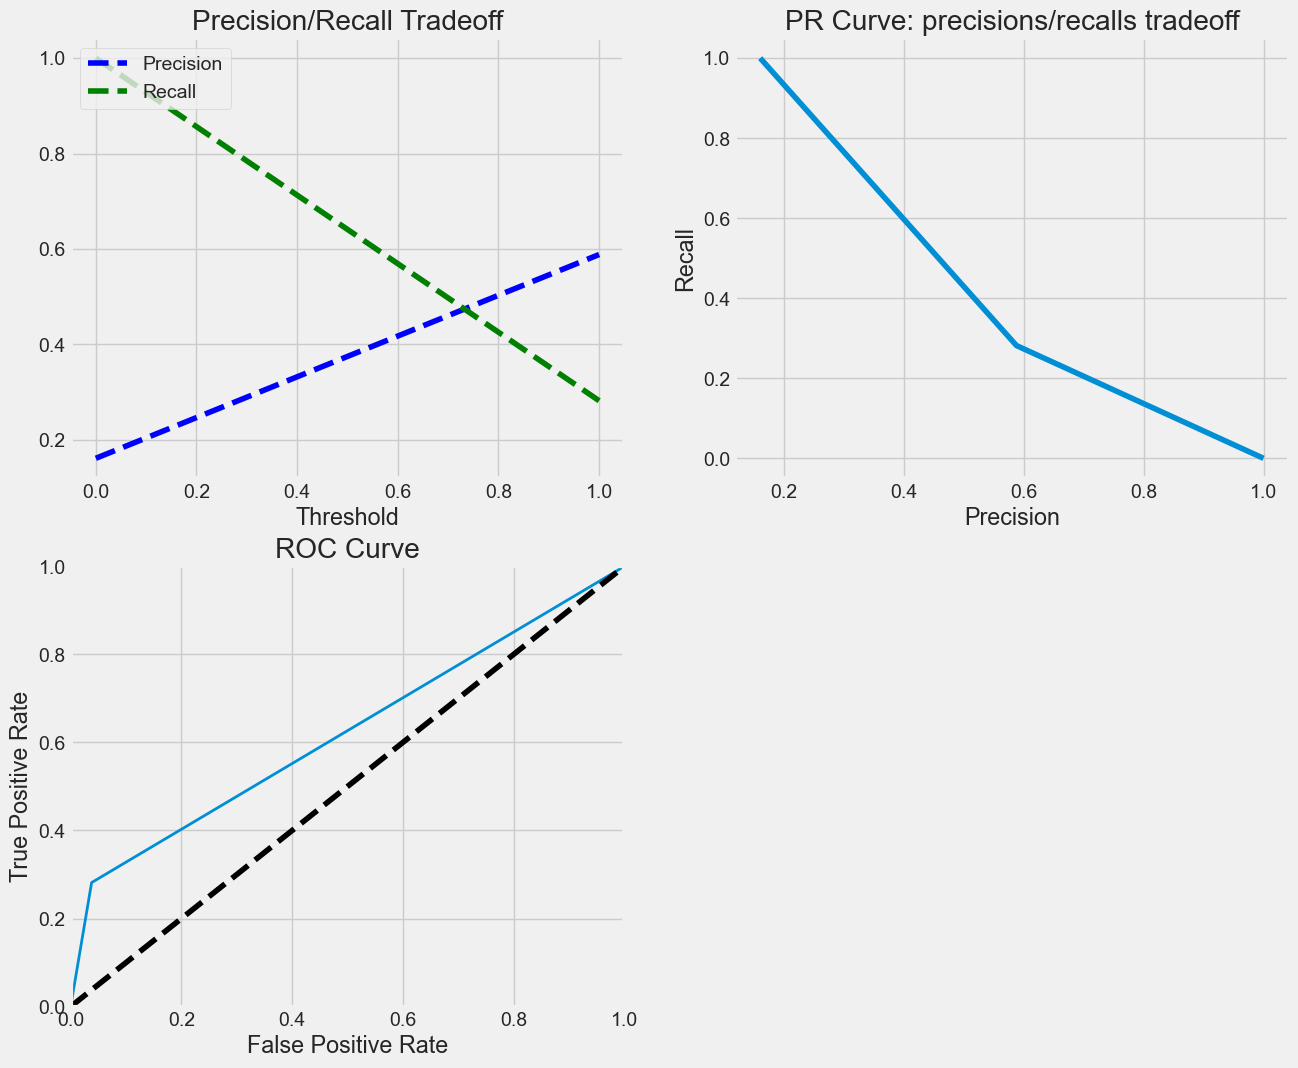

In [90]:
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

Text(0.5, 1.0, 'Feature Importance according to XGBoost')

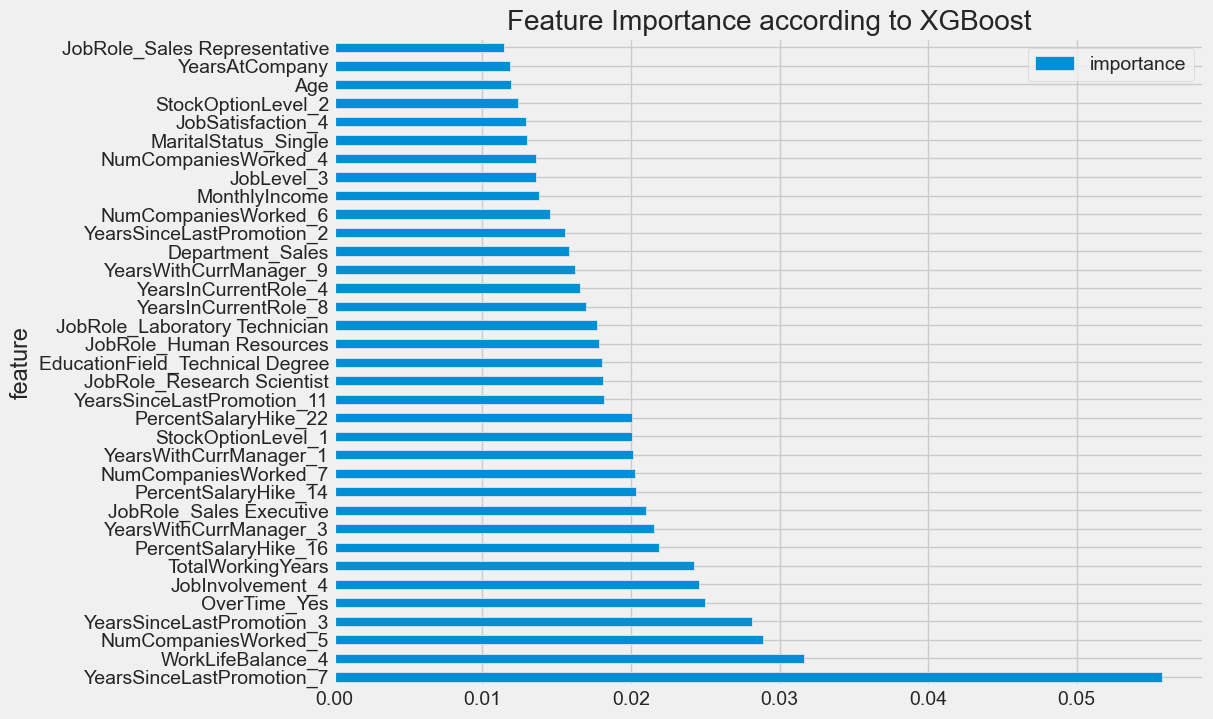

In [91]:
df = feature_imp(X, xgb_clf)[:35]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance according to XGBoost')

 LightGBM

In [92]:
!pip install lightgbm

In [93]:
from lightgbm import LGBMClassifier

In [94]:
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 166, number of negative: 863
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1176
[LightGBM] [Info] Number of data points in the train set: 1029, number of used features: 108
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161322 -> initscore=-1.648427
[LightGBM] [Info] Start training from score -1.648427


LGBMClassifier()

In [95]:
evaluate(lgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   863.00 166.00      1.00    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[357  13]
 [ 53  18]]
ACCURACY SCORE:
0.8503
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.87  0.58      0.85       0.73          0.82
recall      0.96  0.25      0.85       0.61          0.85
f1-score    0.92  0.35      0.85       0.63          0.82
support   370.00 71.00      0.85     441.00        441.00


In [96]:
precisions, recalls, thresholds = precision_recall_curve(y_test, lgb_clf.predict(X_test))

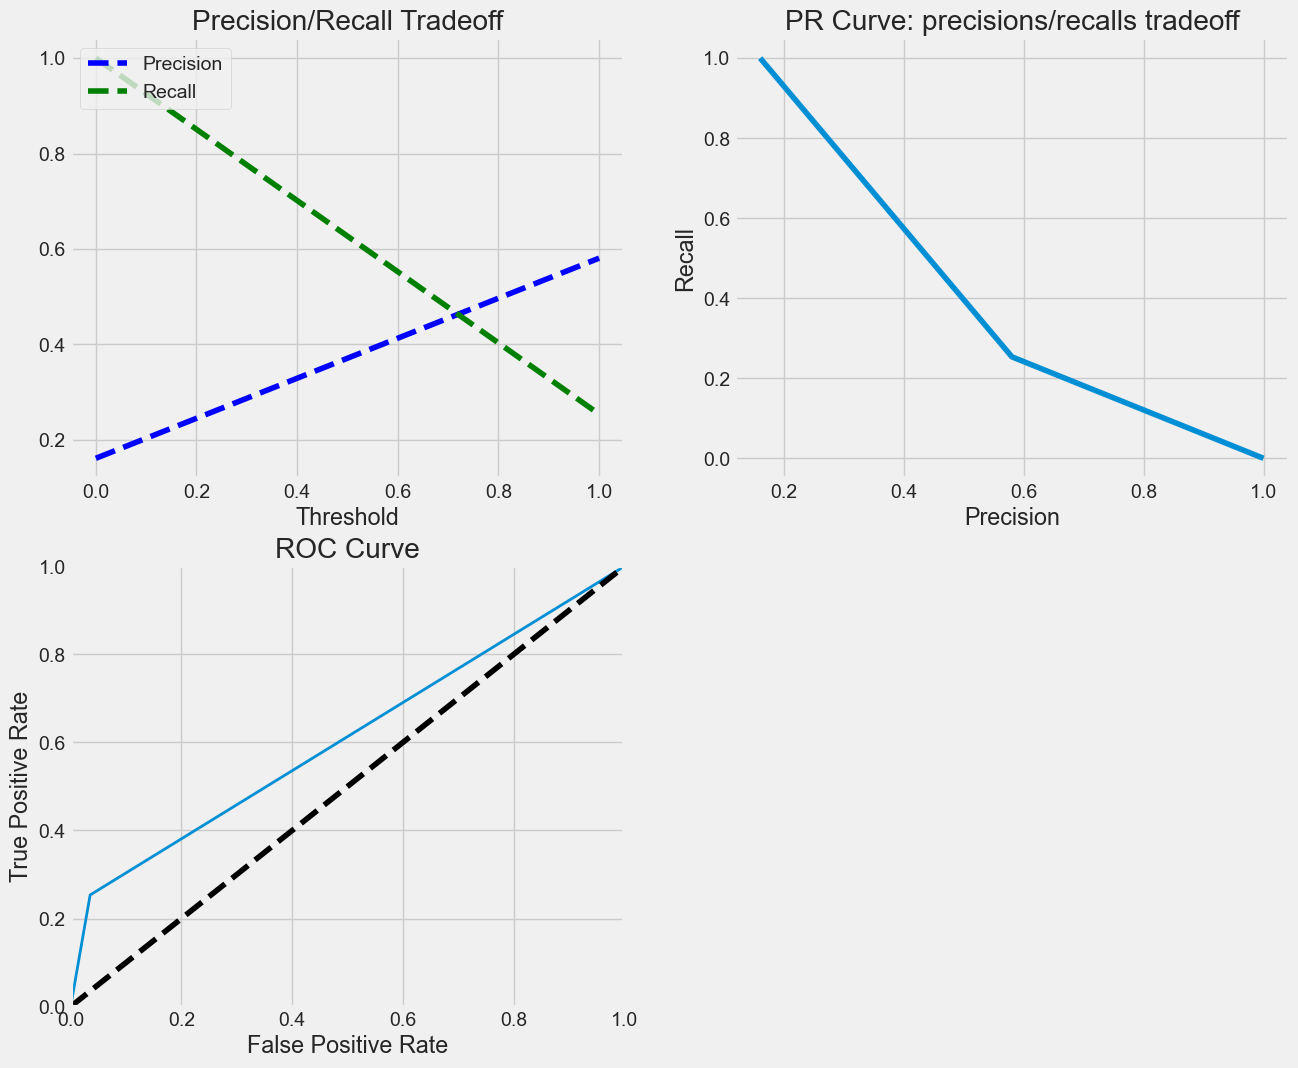

In [97]:
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)


In [98]:
scores_dict['LightGBM'] = {
        'Train': roc_auc_score(y_train, lgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, lgb_clf.predict(X_test)),}


 CatBoost

In [99]:
!pip install catboost

In [100]:
from catboost import CatBoostClassifier


In [101]:
cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train, verbose=0)

In [102]:
evaluate(cb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [ 16 150]]
ACCURACY SCORE:
0.9845
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.98   1.00      0.98       0.99          0.98
recall      1.00   0.90      0.98       0.95          0.98
f1-score    0.99   0.95      0.98       0.97          0.98
support   863.00 166.00      0.98    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[361   9]
 [ 57  14]]
ACCURACY SCORE:
0.8503
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.86  0.61      0.85       0.74          0.82
recall      0.98  0.20      0.85       0.59          0.85
f1-score    0.92  0.30      0.85       0.61          0.82
support   370.00 71.00      0.85     441.00        441.00


In [103]:
precisions, recalls, thresholds = precision_recall_curve(y_test, cb_clf.predict(X_test))

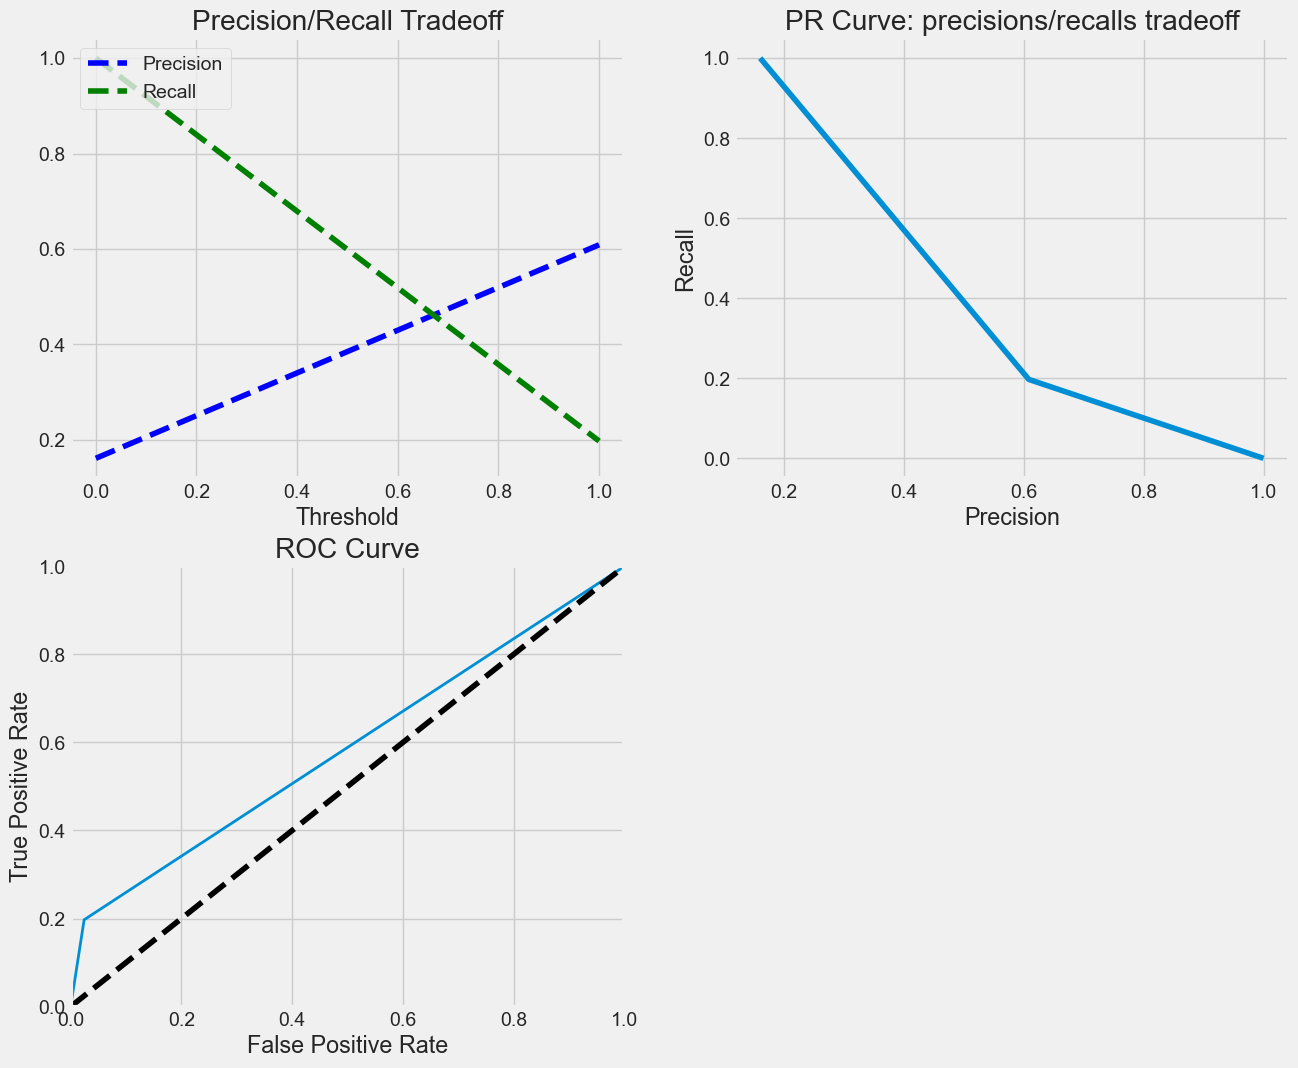

In [104]:
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, cb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)


In [105]:
scores_dict['CatBoost'] = {
        'Train': roc_auc_score(y_train, cb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, cb_clf.predict(X_test)),}

AdaBoost

In [106]:
from sklearn.ensemble import AdaBoostClassifier

In [107]:
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)

C:\Users\Lalit Karki\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [108]:
evaluate(ab_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[843  20]
 [ 88  78]]
ACCURACY SCORE:
0.8950
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.91   0.80      0.90       0.85          0.89
recall      0.98   0.47      0.90       0.72          0.90
f1-score    0.94   0.59      0.90       0.77          0.88
support   863.00 166.00      0.90    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[344  26]
 [ 52  19]]
ACCURACY SCORE:
0.8231
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.87  0.42      0.82       0.65          0.80
recall      0.93  0.27      0.82       0.60          0.82
f1-score    0.90  0.33      0.82       0.61          0.81
support   370.00 71.00      0.82     441.00        441.00


In [109]:
precisions, recalls, thresholds = precision_recall_curve(y_test, ab_clf.predict(X_test))

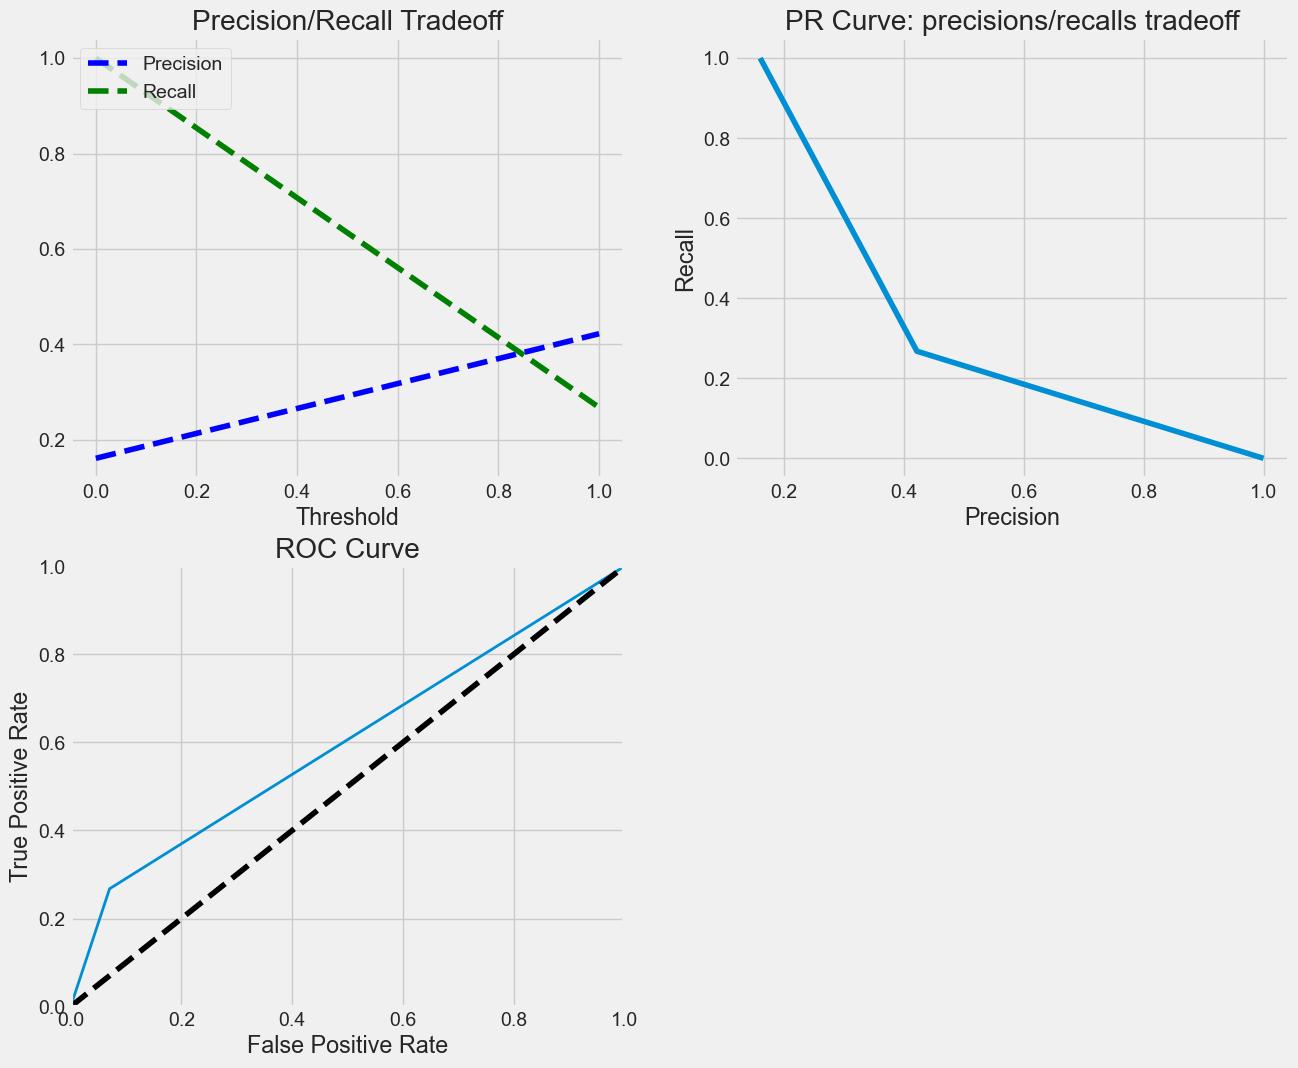

In [110]:
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, ab_clf.predict(X_test))
plot_roc_curve(fpr, tpr)


In [111]:
scores_dict['AdaBoost'] = {
        'Train': roc_auc_score(y_train, ab_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, ab_clf.predict(X_test)),}

 Comparing Models Prerformance

In [112]:
ml_models = {
    'Random Forest': rf_clf, 
    'XGBoost': xgb_clf, 
    'Logistic Regression': lr_clf,
    'Support Vector Machine': svm_clf,
    'LightGBM': lgb_clf,
    'CatBoost': cb_clf,
    'AdaBoost': ab_clf}


In [113]:
for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.528
XGBOOST                        roc_auc_score: 0.622


C:\Users\Lalit Karki\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Lalit Karki\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


LOGISTIC REGRESSION            roc_auc_score: 0.546
SUPPORT VECTOR MACHINE         roc_auc_score: 0.500
LIGHTGBM                       roc_auc_score: 0.609
CATBOOST                       roc_auc_score: 0.586
ADABOOST                       roc_auc_score: 0.599


In [114]:
scores_df = pd.DataFrame(scores_dict)
# scores_df.plot(kind='barh', figsize=(15, 8))
scores_df.hvplot.barh()

:Bars   [index,Variable]   (value)